## Урок 2. Домашнее задание

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [5]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

In [6]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [8]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [9]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [10]:
lambda__ = np.linspace(0, 100, 30)
W_0 = []
W_1 = []
W_2 = []
W_3 = []
for lam in lambda__:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lam)
    W_0.append(W[0])
    W_1.append(W[1])
    W_2.append(W[2])
    W_3.append(W[3])

In [11]:
from pylab import rcParams

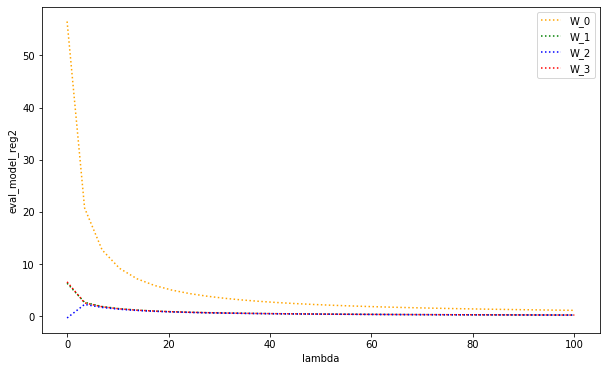

In [12]:
rcParams["figure.figsize"] = 10, 6
plt.xlabel('lambda')
plt.ylabel('eval_model_reg2')

plt.plot(lambda__, W_0, color='orange', linestyle="dotted")
plt.plot(lambda__, W_1, color='green', linestyle="dotted")
plt.plot(lambda__, W_2, color='blue', linestyle="dotted")
plt.plot(lambda__, W_3, color='red', linestyle="dotted")
plt.legend(labels=["W_0", "W_1", "W_2", "W_3"])

Замечание: графики W_1 и W_2 очень близки и в данном масштабе сливаются. 

Вывод: чем больше значения `lambda`, тем больше штраф, тем меньшие веса мы получаем, тем ниже сложность модели, тем меньше вероятность переобучения. Если продолжать увеличивать `lambda`, в какой-то момент оптимальным для модели окажется зануление всех весов, в тоже время слишком низкие значения `lambda` усложняют модель и приводят к её переобучению.

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет, нельзя применить к одному и тому же признаку и нормализацию, и стандартизацию. Т.е. наверно можно, но зачем? Каждый из этих методов производит масштабирование данных и, как я понимаю, нет необходимости в масштабировании одного и того же признака несколькими методами, т.к., по сути, достаточно какого-либо одного. Иначе мы получим "масло масляное" и, предположу, что таким подходом мы можем спутать машину и её обучение на признаках масштабированных несколько раз будет некорректным.

#### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

Исходная функция для `L2-регуляризации`

In [ ]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

- 1 вариант функции для L1-регуляризации

Исключил слагаемое lambda*W

In [ ]:
def eval_model_reg1(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T)) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

- 2 вариант функции для L1-регуляризации

Подумал, что должна быть разница в производных. Если правильно понимаю, для L2 последнее слагаемое $\lambda * w^{2}$, а для L1 - $ |w|$, соответственно будут отличаться и производных от этих слагаемых

In [ ]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2 * (W/np.abs(W))) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W